In [50]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, silhouette_score

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [4]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
def label_encoding(c):
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])
    df[c].unique()
for col in df.columns:
    label_encoding(col)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


<AxesSubplot:xlabel='class', ylabel='count'>

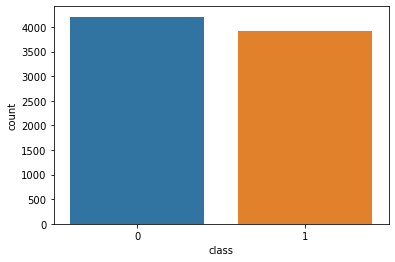

In [24]:
sns.countplot(df['class'])

In [25]:
y = df['class']
max_ = y.value_counts().max()

In [26]:
def subsampling(df, size):
    # We will calculate the number of rows that we will leave for the other classes 
    n_other_classes = int((max_/size - max_)/(len(y.unique())-1))
    print(n_other_classes)
    # We will take randomly n_other_classes lines of each class
    subsample = []
    for label in y.value_counts().index[:2]:
        samples = y[y == label].index.values
        subsample += np.random.choice(samples, n_other_classes).tolist()
    return subsample

In [27]:
size_1 = 0.65
size_2 = 0.75
size_3 = 0.9

In [36]:
subsample_1 =  subsampling(df, size_1)
subsample_2 =  subsampling(df, size_2)
subsample_3 =  subsampling(df, size_3)

2265
1402
467


In [46]:
max_class_label = y.value_counts().index[1]
df_max_class = df[df['class']==max_class_label]

df_1 = pd.concat([df_max_class, df.iloc[subsample_1]])
df_2 = pd.concat([df_max_class, df.iloc[subsample_2]])
df_3 = pd.concat([df_max_class, df.iloc[subsample_3]])

#To make sure
print(df_1['class'].value_counts().max()/df_1['class'].value_counts().sum())
print(df_2['class'].value_counts().max()/df_2['class'].value_counts().sum())
print(df_3['class'].value_counts().max()/df_3['class'].value_counts().sum())

0.7407873655298696
0.8000570450656018
0.9091793076623882


In [30]:
df_1.to_csv('df_1.csv',index=False)
df_2.to_csv('df_2.csv',index=False)
df_3.to_csv('df_3.csv',index=False)

In [31]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score

#Create a Random forest Classifier
clf=RandomForestClassifier(n_estimators=5)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [32]:
X = df.iloc[:,[0,1,2,3,4]]
y = df["class"]

lst_accu_stratified = []
lst_f1score_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    
    lst_accu_stratified.append(clf.score(x_test, y_test))
    lst_f1score_stratified.extend(f1_score(y_test,clf.predict(x_test), average=None))
    
    
    #plot_confusion_matrix(clf, x_train,y_train)

print('List of possible accuracy:', lst_accu_stratified)
print('\nOverall accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nOverall F1 Score:', mean(lst_f1score_stratified)*100, '%')

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Overall accuracy: 100.0 %

Overall F1 Score: 100.0 %


In [34]:
X = df_1.iloc[:,[0,1,2,3,4]]
y = df_1["class"]

lst_accu_stratified_1 = []
lst_f1score_stratified_1 = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    
    lst_accu_stratified_1.append(clf.score(x_test, y_test))
    lst_f1score_stratified_1.extend(f1_score(y_test,clf.predict(x_test), average=None))
    
    
    #plot_confusion_matrix(clf, x_train,y_train)

print('List of possible accuracy:', lst_accu_stratified_1)
print('\nOverall accuracy:', mean(lst_accu_stratified_1)*100, '%')
print('\nOverall F1 Score:', mean(lst_f1score_stratified_1)*100, '%')

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Overall accuracy: 100.0 %

Overall F1 Score: 100.0 %


In [47]:
X = df_2.iloc[:,[0,1,2,3,4]]
y = df_2["class"]

lst_accu_stratified_2 = []
lst_f1score_stratified_2 = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    
    lst_accu_stratified_2.append(clf.score(x_test, y_test))
    lst_f1score_stratified_2.extend(f1_score(y_test,clf.predict(x_test), average=None))
    
    
    #plot_confusion_matrix(clf, x_train,y_train)

print('List of possible accuracy:', lst_accu_stratified_2)
print('\nOverall accuracy:', mean(lst_accu_stratified_2)*100, '%')
print('\nOverall F1 Score:', mean(lst_f1score_stratified_2)*100, '%')

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Overall accuracy: 100.0 %

Overall F1 Score: 100.0 %


In [49]:
X = df_3.iloc[:,[0,1,2,3,4]]
y = df_3["class"]

lst_accu_stratified_3 = []
lst_f1score_stratified_3 = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    
    lst_accu_stratified_3.append(clf.score(x_test, y_test))
    lst_f1score_stratified_3.extend(f1_score(y_test,clf.predict(x_test), average=None))
    
    
    #plot_confusion_matrix(clf, x_train,y_train)

print('List of possible accuracy:', lst_accu_stratified_3)
print('\nOverall accuracy:', mean(lst_accu_stratified_3)*100, '%')
print('\nOverall F1 Score:', mean(lst_f1score_stratified_3)*100, '%')

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9980544747081712, 1.0, 1.0]

Overall accuracy: 99.98054474708171 %

Overall F1 Score: 99.9408889655569 %


In [52]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

X = df.iloc[:,[0,1,2,3,4]]
y = df["class"]

lst_x_train = []
lst_x_test  = []
lst_y_train = []
lst_y_test  = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test, y_train, y_test  = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    lst_x_train.append(x_train)
    lst_x_test.append(x_test)
    lst_y_train.append(y_train)
    lst_y_test.append(y_test)

In [53]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(x_train)
	distortions.append(sum(np.min(cdist(x_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x_train.shape[0])
	inertias.append(kmeanModel.inertia_)
	mapping1[k] = sum(np.min(cdist(x_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x_train.shape[0]
	mapping2[k] = kmeanModel.inertia_

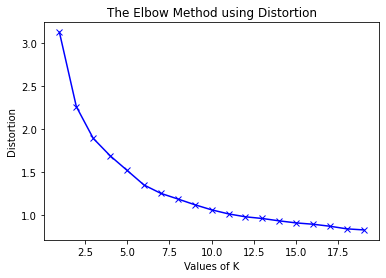

In [54]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

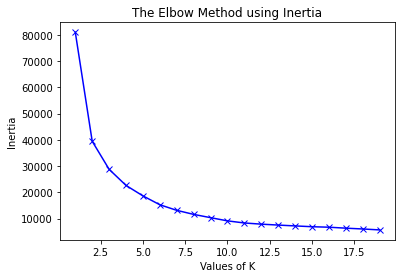

In [55]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

[0.5051758266042528, 0.39557403786437756, 0.4010020878099075, 0.40912268764911036, 0.44519858935673795]


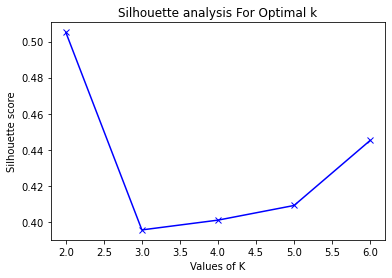

In [56]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x_train)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(x_train, cluster_labels))


print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [57]:
lst_f1_score = []

for i in range(10):
    print('Fold:\t',i+1)
    print('*'*100)
    data = lst_x_train[i]
    kmeanModel = KMeans(n_clusters=5).fit(data)
    data['cluster'] = kmeanModel.labels_
    data['class'] = lst_y_train[i]
    print("Centroid :", kmeanModel.cluster_centers_)
    
    # Cluster 0
    cluster_0 = data[data['cluster']==0]
    print('The classes present in cluster 0:')
    print(cluster_0['class'].unique())
    # Cluster 1
    print('The classes present in cluster 1:')
    cluster_1 = data[data['cluster']==1]
    print(cluster_1['class'].unique())
    # Cluster 2
    print('The classes present in cluster 2:')
    cluster_2 = data[data['cluster']==2]
    print(cluster_2['class'].unique())
    # Cluster 3
    print('The classes present in cluster 3:')
    cluster_3 = data[data['cluster']==3]
    print(cluster_3['class'].unique())
    # Cluster 4
    print('The classes present in cluster 4:')
    cluster_4 = data[data['cluster']==4]
    print(cluster_4['class'].unique())
    
    x_train_0, y_train_0 = cluster_0.iloc[:,[0,1,2,3,4]] , cluster_0["class"]
    x_train_1, y_train_1 = cluster_1.iloc[:,[0,1,2,3,4]] , cluster_1["class"]
    x_train_2, y_train_2 = cluster_2.iloc[:,[0,1,2,3,4]] , cluster_2["class"]
    x_train_3, y_train_3 = cluster_3.iloc[:,[0,1,2,3,4]] , cluster_3["class"]
    x_train_4, y_train_4 = cluster_4.iloc[:,[0,1,2,3,4]] , cluster_4["class"]
    
    lst_clf = [RandomForestClassifier(n_estimators=10)]*5

    lst_clf[0].fit(x_train_0, y_train_0)
    lst_clf[1].fit(x_train_1, y_train_1)
    lst_clf[2].fit(x_train_2, y_train_2)
    lst_clf[3].fit(x_train_3, y_train_3)
    lst_clf[4].fit(x_train_4, y_train_4)
    
    cluster_pred = []
    class_pred   = []
        
    for j in range(len(lst_x_test[i])):
        cluster_pred_j = kmeanModel.predict(lst_x_test[i].iloc[[j]])[0]
        class_pred_j = lst_clf[cluster_pred_j].predict(lst_x_test[i].iloc[[j]])[0]

        cluster_pred.append(cluster_pred_j)
        class_pred.append(class_pred_j)

    lst_x_test[i]['cluster_pred'] = cluster_pred
    lst_x_test[i]['class_pred'] = class_pred
    f1_score_ = f1_score(lst_y_test[i], lst_x_test[i]['class_pred'], average='micro')
    lst_f1_score.append(f1_score_)
    print('f1_score for Fold',i,':\t',f1_score_)
    

    

Fold:	 1
****************************************************************************************************
Centroid : [[6.05206074e-01 2.19262473e+00 2.53101952e+00 3.04425163e+00
  3.30585683e-01]
 [4.76683938e-01 5.00000000e+00 1.79689119e+00 8.48186528e+00
  4.40414508e-01]
 [5.57888041e-01 5.00000000e+00 2.58524173e+00 3.07824427e+00
  4.09033079e-01]
 [2.37524950e-01 3.57085828e+00 1.17683641e-14 3.14038589e+00
  5.11643380e-01]
 [4.50310559e-01 1.44927536e+00 1.82608696e+00 8.47515528e+00
  4.54451346e-01]]
The classes present in cluster 0:
[0 1]
The classes present in cluster 1:
[0 1]
The classes present in cluster 2:
[1 0]
The classes present in cluster 3:
[0 1]
The classes present in cluster 4:
[0 1]
f1_score for Fold 0 :	 1.0
Fold:	 2
****************************************************************************************************
Centroid : [[2.36666667e-01 3.58133333e+00 4.88498131e-15 3.14066667e+00
  5.14666667e-01]
 [4.50704225e-01 1.45975855e+00 1.82696177e+00 8.4

In [58]:
print('F1_scores:\n', lst_f1_score)
print('The Average:', mean(lst_f1_score))
print('Standard Deviation:', stdev(lst_f1_score))

F1_scores:
 [1.0, 1.0, 0.998769987699877, 1.0, 0.8472906403940886, 1.0, 1.0, 0.916256157635468, 1.0, 1.0]
The Average: 0.9762316785729434
Standard Deviation: 0.052371919470141415
